### TabNet: Attentive Interpretable Tabular Learning

https://github.com/dreamquark-ai/tabnet

This model uses sequential attention to learn which features to focus on. 

In [28]:
import pandas as pd

from pytorch_tabnet.tab_model import TabNetClassifier

from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

In [12]:
df = pd.read_csv('../data/cleaned_data_general_final.csv')

X = df.drop(['Show'], axis=1)
y = df['Show']

#### With IHT

In [13]:
iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


clf = TabNetClassifier()

/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [32]:
clf.fit(
    X_train=X_train.values,
    y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_val.values, y_val.values)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=50,
    patience=5,
)

epoch 0  | loss: 0.47541 | train_auc: 0.35376 | train_accuracy: 0.41658 | valid_auc: 0.35799 | valid_accuracy: 0.41381 |  0:00:03s
epoch 1  | loss: 0.31152 | train_auc: 0.56107 | train_accuracy: 0.49809 | valid_auc: 0.55362 | valid_accuracy: 0.50274 |  0:00:06s
epoch 2  | loss: 0.29363 | train_auc: 0.82945 | train_accuracy: 0.56854 | valid_auc: 0.8368  | valid_accuracy: 0.57048 |  0:00:10s
epoch 3  | loss: 0.28609 | train_auc: 0.90956 | train_accuracy: 0.75452 | valid_auc: 0.91132 | valid_accuracy: 0.75713 |  0:00:13s
epoch 4  | loss: 0.2795  | train_auc: 0.92296 | train_accuracy: 0.88746 | valid_auc: 0.9262  | valid_accuracy: 0.88974 |  0:00:17s
epoch 5  | loss: 0.27727 | train_auc: 0.92205 | train_accuracy: 0.88065 | valid_auc: 0.92295 | valid_accuracy: 0.88426 |  0:00:20s
epoch 6  | loss: 0.26768 | train_auc: 0.94056 | train_accuracy: 0.87971 | valid_auc: 0.94431 | valid_accuracy: 0.88296 |  0:00:24s
epoch 7  | loss: 0.26337 | train_auc: 0.94284 | train_accuracy: 0.88721 | valid_auc

/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [33]:
y_pred = clf.predict(X_test.values)

print('Accuracy: ', round(accuracy_score(y_test, y_pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_test, y_pred)*100, 2), '%')

Accuracy:  91.04 %
F1 Score:  91.26 %


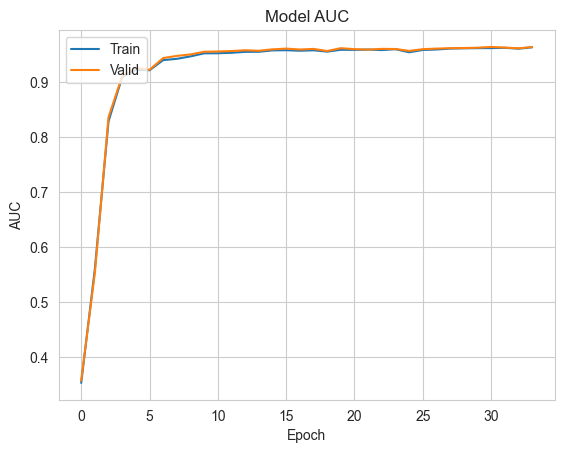

In [34]:
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

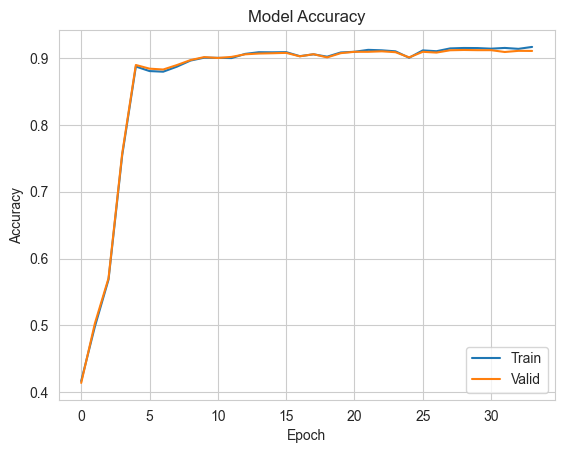

In [37]:
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='lower right')
plt.show()

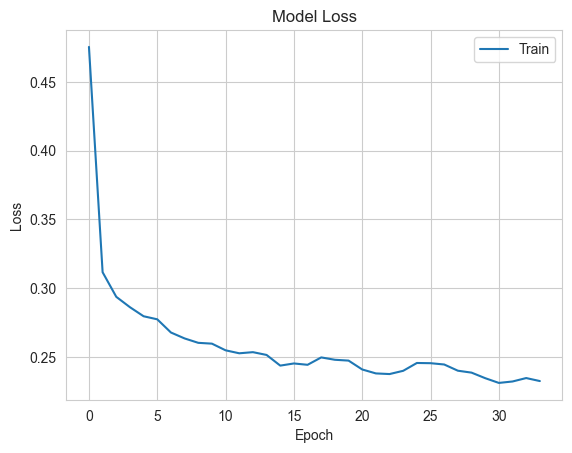

In [38]:
plt.plot(clf.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

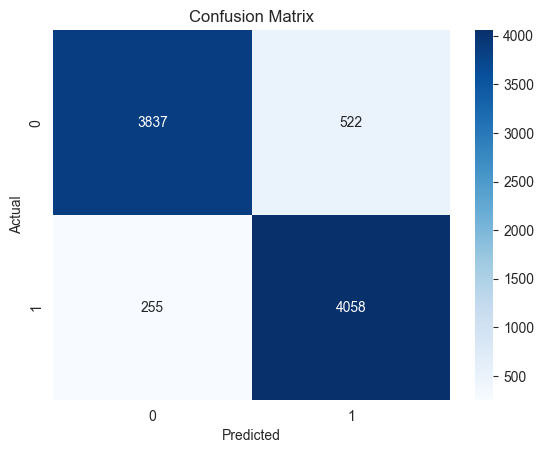

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4359
           1       0.89      0.94      0.91      4313

    accuracy                           0.91      8672
   macro avg       0.91      0.91      0.91      8672
weighted avg       0.91      0.91      0.91      8672

